<a href="https://colab.research.google.com/github/selenecarnerocid/Selene-Carnero-Cid/blob/main/home_credit_default_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Home Credit Default Risk**

## **Introduction**
This notebook is intended to work on machine learning. So we will take a look at the home credit default risk.

The objective is to use an historical loan application data to predict whether or not an applicant will be able to repay a loan.

Classification: The label is a binary variable, if it's 0 the applicant will repay loan on time, but if it's 1 he will have difficulties to pay.

**Imports**
We are using a typical data science stack: numpy, pandas, sklearn, matplotlib.

First of all, I import all the libraries that I'm going to use.

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

**Read in Data**
Then, we can list all the data files.

There are a total of 10 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 7 other files containing additional information about each loan.

In [ ]:
# List files available
print(os.listdir("/content"))

['.config', 'application_test.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv', 'bureau.csv', 'credit_card_balance.csv', 'previous_application.csv', 'application_train.csv', 'installments_payments.csv', 'HomeCredit_columns_description.csv', 'sample_submission.csv', 'sample_data']


Now, we read the training data.

It contains the ID, if they can be able to pay a loan on time, the contract type, the gender, ...

In [ ]:
# Training data
app_train = pd.read_csv('/content/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (5789, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This training data has 5789 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

Now, we test the data features, but...

In [ ]:
# Testing data features
app_test = pd.read_csv('/content/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (7730, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0.0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0.0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0.0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2.0,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1.0,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


The set is so smaller and lacks a TARGET column.

## **Exploratory Data Analysis**
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us.

We are going to examine the number of loans falling into each category.

In [ ]:
app_train['TARGET'].value_counts()

0    5341
1     448
Name: TARGET, dtype: int64

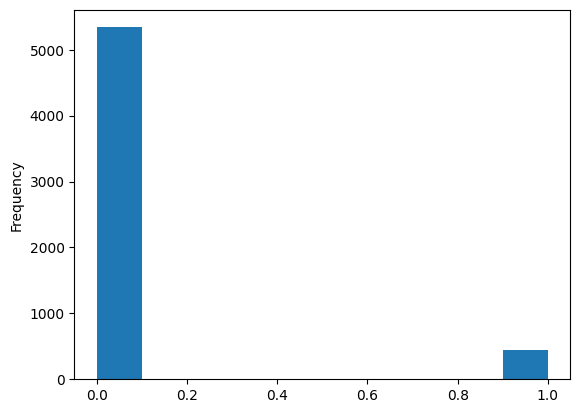

In [ ]:
app_train['TARGET'].astype(int).plot.hist();

From this information, we see that there are far more loans that were repaid on time (5341) than loans that were not repaid(448).

## **Examine Missing Values**
Next we can look at the number and percentage of missing values in each column.

In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Our selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are a total of " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(5)

Our selected dataframe has 238 columns.
There are a total of 80 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,3990,68.9
COMMONAREA_MODE,3990,68.9
COMMONAREA_MEDI,3990,68.9
NONLIVINGAPARTMENTS_MEDI,3970,68.6
NONLIVINGAPARTMENTS_AVG,3970,68.6


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). Therefore, we will keep all of the columns for now.

## **Column Types**
Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). But object columns contain strings and are categorical features.

In [ ]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    85
int64      21
object     16
dtype: int64

Let's now look at the number of unique entries in each of the object columns.

In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               5
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a small number of unique entries.

So, we proceed to encoding them as numbers before handing them off to the model because a machine learning model cannot deal with it.

So we will use one-hot encoding: It is a method that assigns numeric values to each categorical variable in which all bits are '0' except one.

In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (5789, 238)
Testing Features shape:  (7730, 240)


## **Anomalies**
One of the most important problems is anomalies within the data.

They may be caused by errors in the measuring equipment, or they may be valid but extreme measurements.

How about the days of employment? That doesn't look right...

The maximum value (besides being positive) is about 1000 years!


In [ ]:
app_train['DAYS_EMPLOYED'].describe()

count      5789.000000
mean      64291.327345
std      141687.944890
min      -15632.000000
25%       -2800.000000
50%       -1212.000000
75%        -298.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates than the rest of the clients.

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.17% of loans
The anomalies default on 5.81% of loans
There are 1050 anomalous days of employment


That is very interesting because it turns out that the anomalies have a lower rate of default.

As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

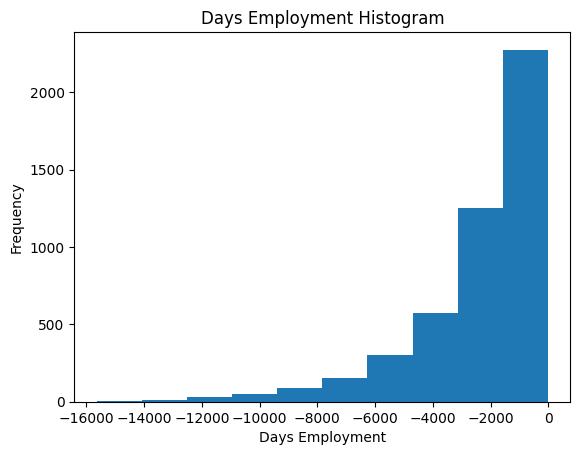

In [ ]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


The distribution looks to be much more in line with what we would expect.
As an important note, anything we do to the training data we also have to do to the testing data.

## **Effect of Age on Repayment**


**Correlations**
Now let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target using the Pearson correlation. Some general interpretations of this absolute value are:

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”

In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_LAST_PHONE_CHANGE                               0.063141
NAME_EDUCATION_TYPE_Secondary / secondary special    0.065583
DAYS_ID_PUBLISH                                      0.067846
NAME_INCOME_TYPE_Working                             0.068363
REGION_RATING_CLIENT                                 0.074212
REGION_RATING_CLIENT_W_CITY                          0.075377
DAYS_EMPLOYED                                        0.097942
TARGET                                               1.000000
FLAG_MOBIL                                                NaN
FLAG_DOCUMENT_2                                           NaN
FLAG_DOCUMENT_4                                           NaN
FLAG_DOCUMENT_7                                           NaN
FLAG_DOCUMENT_10                                          NaN
FLAG_DOCUMENT_12                                          NaN
DAYS_EMPLOYED_ANOM                                        NaN
Name: TARGET, dtype: float64

Most Negati

The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan.

That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

In [ ]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07514850749735578

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable and make a plot to visualize the effect of the age on the target (Blue: repaid on time).

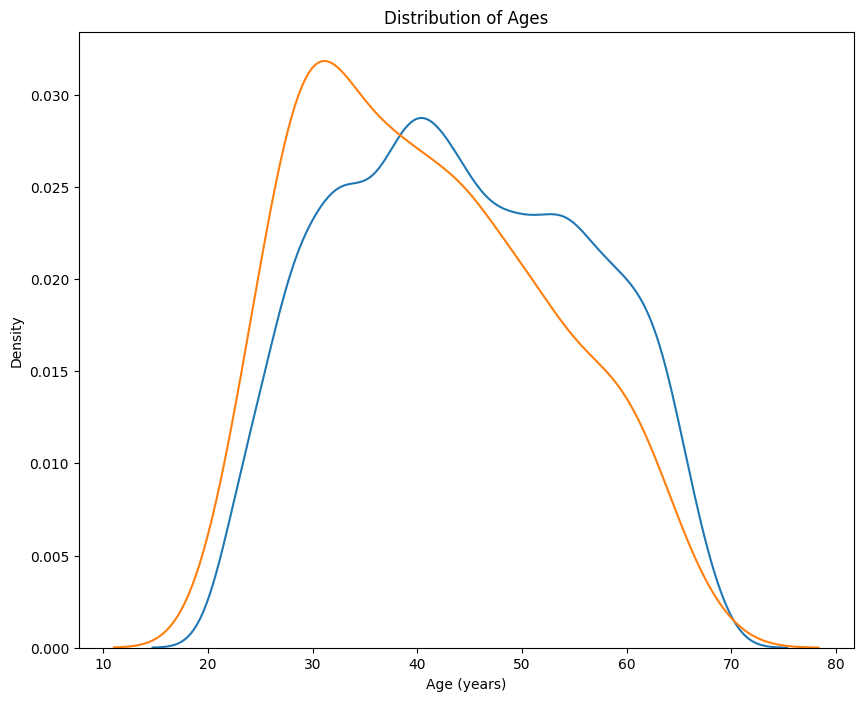

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The blue target curve leans towards the younger end of the range, so they tend to pay less. Let's look at this relationship another way: average loan defaults by age bracket.

First we cut the age category into bins of 5 years each.

In [ ]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

Then we group all.

In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()

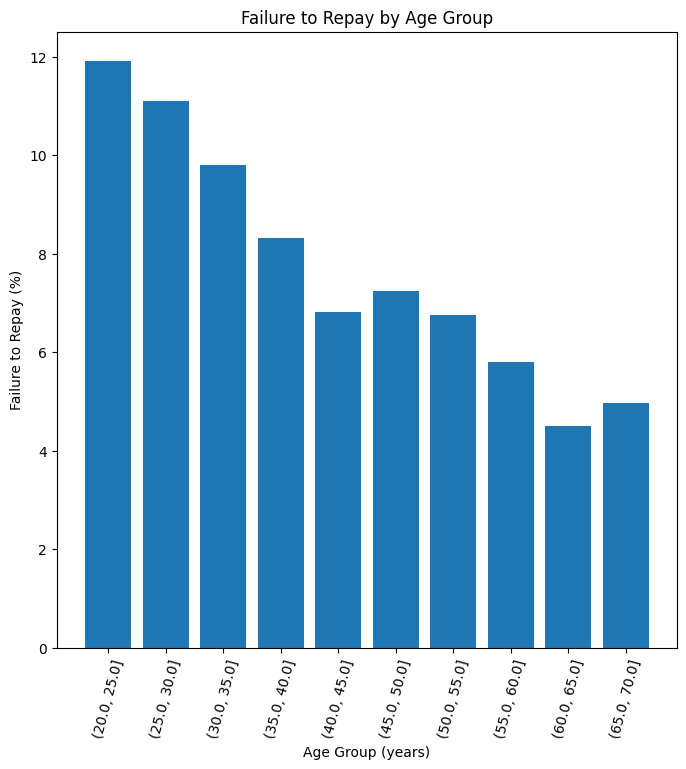

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# **Conclusion**
There is a clear trend: younger applicants are more likely to not repay the loan!

This information can be used directly by the bank: because younger customers are less likely to repay the loan, perhaps they should be given more guidance of finance.

This doesn't mean a discrimination against younger customers, but it would be smart to take precautions to help younger customers pay on time.